In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv("spotify_millsongdata.csv")
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [3]:
df.shape

(57650, 4)

In [4]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [5]:
top_artists = df['artist'].value_counts().head(10)
print(top_artists)

artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [6]:
df = df.sample(10000)
df = df.drop('link', axis= 1).reset_index(drop= True)

In [7]:
all_lyrics = " ".join(df['text'].dropna())
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height= 400,background_color= "white").generate(all_lyrics)

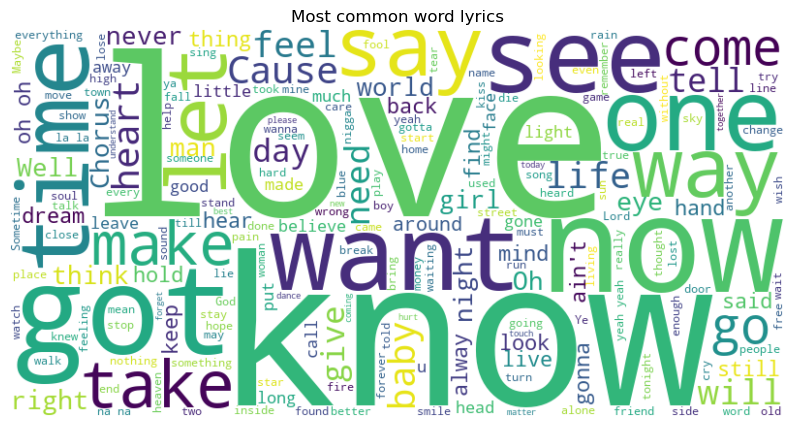

In [8]:
plt.figure(figsize=(10,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common word lyrics')
plt.show()

In [9]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Sunil
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Sunil
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sunil
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stop_words = set(stopwords.words('english'))

In [11]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [12]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [13]:
df.head()

,artist,song,text,cleaned_text
0,Lil Wayne,I Like The View,"I stepped on a flower, foot on the petal \r\n...",stepped flower foot petal good wasnt home sett...
1,Queen,The Miracle,Every drop of rain that falls in Sahara Desert...,every drop rain falls sahara desert says mirac...
2,Pet Shop Boys,Everything Means Something,You said you're overreacting \r\nYou're readi...,said youre overreacting youre reading much thi...
3,Tragically Hip,Daredevil,I can't imagine how you feel and this is how y...,cant imagine feel feel say name like youre lon...
4,Kyla,Kung Maaari Lang,Ooh... \r\n \r\nAng bukas ko ang buhay ko \...,ooh ang bukas ko ang buhay ko inialay na ang l...


In [14]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [15]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [16]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [17]:
df["song"][2]

'Everything Means Something'

In [18]:
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
Song not found in the dataset!
